# Basit Lineer Regresyon:

$$ y = \beta_0 + \beta_1X + \epsilon $$

In [38]:
# importlarımızı yapıyoruz

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\cleaned_data.xlsx"

# Dosya yolunun var olup olmadığını kontrol et
if os.path.exists(dosya_yolu):
    print("Dosya mevcut!")
    # Dosyayı oku
    df_ = pd.read_excel(dosya_yolu)
    df = df_.copy()
else:
    print("Dosya yolu yanlış veya dosya mevcut değil.")


Dosya mevcut!


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ekran_Boyutu         1200 non-null   object 
 1   Ekran_Karti          1200 non-null   object 
 2   GPU_Bellek_Tipi      1200 non-null   object 
 3   GPU_Gucu             1200 non-null   int64  
 4   GPU_Hafizasi         1200 non-null   int64  
 5   GPU_Tipi             1200 non-null   object 
 6   Yenileme_Hizi        1200 non-null   int64  
 7   Max_CPU_Hizi_GHz     1200 non-null   float64
 8   Panel_Tipi           1200 non-null   object 
 9   RAM                  1200 non-null   int64  
 10  RAM_Tipi             1200 non-null   object 
 11  Renk                 1200 non-null   object 
 12  SSD_Kapasitesi       1200 non-null   int64  
 13  CPU_Cekirdek_Sayisi  1200 non-null   int64  
 14  Isletim_Sistemi      1200 non-null   object 
 15  Islemci              1200 non-null   o

In [41]:
df.describe()

,GPU_Gucu,GPU_Hafizasi,Yenileme_Hizi,Max_CPU_Hizi_GHz,RAM,SSD_Kapasitesi,CPU_Cekirdek_Sayisi,Fiyat
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,106.145833,7.150000,160.507500,4.724250,30.793333,1063.820000,12.559167,51.632791
std,16.301974,2.633745,38.395487,0.208822,22.997928,938.071427,6.011374,31.510955
min,45.000000,4.000000,60.000000,4.200000,8.000000,256.000000,1.000000,15.049000
25%,106.000000,6.000000,144.000000,4.700000,16.000000,512.000000,8.000000,32.932750
50%,106.000000,6.000000,144.000000,4.700000,24.000000,1024.000000,12.000000,42.309500
75%,106.000000,8.000000,165.000000,4.900000,32.000000,1024.000000,16.000000,55.206000
max,175.000000,16.000000,360.000000,5.000000,128.000000,8192.000000,24.000000,240.081000


In [42]:
data = df[["SSD_Kapasitesi","Fiyat"]]

X = data["SSD_Kapasitesi"]

y = data["Fiyat"]

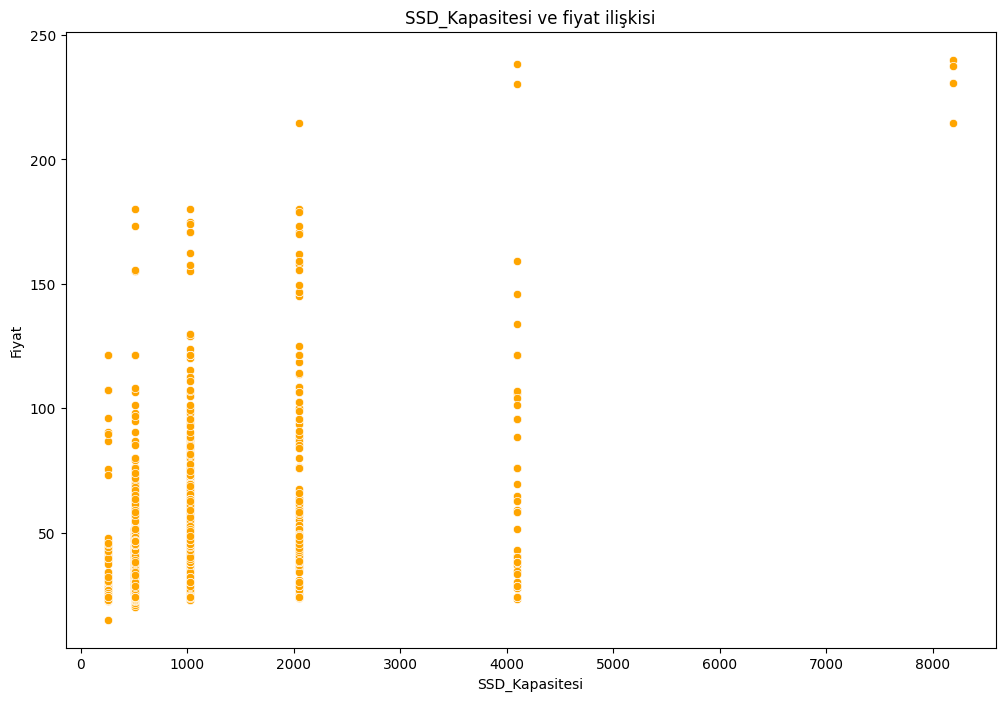

In [43]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=data,x="SSD_Kapasitesi",y="Fiyat",color= "orange")

plt.title("SSD_Kapasitesi ve fiyat ilişkisi")
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
print("x in boyutu:",X.shape)
print("x in boyutu:",y.shape)

x in boyutu: (1200,)
x in boyutu: (1200,)


In [47]:
# lineer regression 2 boyutlu olması gerek o yüzden tekrardan boyutlandırdık
X = X.values.reshape(-1,1)

In [48]:
print("x in boyutu:",X.shape)

x in boyutu: (1200, 1)


In [49]:
y = y.values.reshape(-1,1)

In [50]:
print("x in boyutu:",y.shape)

x in boyutu: (1200, 1)


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [53]:
print("X_train şekli:",X_train.shape)
print("X_test şekli:",X_test.shape)
print("y_train şekli:",y_train.shape)
print("y_test şekli:",y_test.shape)

X_train şekli: (840, 1)
X_test şekli: (360, 1)
y_train şekli: (840, 1)
y_test şekli: (360, 1)


In [54]:
type(X_train)

numpy.ndarray

In [55]:
import numpy as np

# NaN değerlerini say
nan_count = np.isnan(y_train).sum()
print(f"Number of NaN values in y_train: {nan_count}")

# NaN olan değerlerin yerlerini göster
nan_indices = np.where(np.isnan(y_train))
print(f"Indices of NaN values: {nan_indices}")

Number of NaN values in y_train: 0
Indices of NaN values: (array([], dtype=int64), array([], dtype=int64))


In [56]:
print(y_train)

[[ 39.998]
 [ 65.597]
 [ 24.999]
 [ 26.999]
 [ 43.791]
 [ 49.083]
 [ 29.999]
 [ 38.094]
 [ 42.999]
 [128.87 ]
 [ 34.299]
 [ 30.604]
 [ 40.516]
 [ 45.999]
 [ 29.999]
 [ 27.845]
 [ 51.369]
 [ 39.999]
 [ 26.999]
 [ 39.999]
 [ 51.599]
 [ 95.723]
 [ 67.025]
 [ 88.399]
 [128.87 ]
 [ 29.999]
 [ 39.699]
 [ 35.957]
 [ 42.729]
 [ 90.799]
 [ 59.305]
 [ 69.999]
 [ 38.094]
 [ 47.799]
 [ 45.   ]
 [ 43.006]
 [ 58.221]
 [ 40.579]
 [ 39.999]
 [ 28.199]
 [ 48.599]
 [ 58.999]
 [ 39.099]
 [ 29.999]
 [ 29.968]
 [ 50.999]
 [ 53.698]
 [ 30.443]
 [ 86.699]
 [ 36.799]
 [ 33.139]
 [ 31.629]
 [ 31.499]
 [ 31.999]
 [ 31.999]
 [ 40.439]
 [ 55.994]
 [ 31.499]
 [ 44.488]
 [ 49.999]
 [ 46.999]
 [ 49.499]
 [ 95.723]
 [ 86.699]
 [ 44.103]
 [ 46.198]
 [ 46.699]
 [ 37.999]
 [ 45.999]
 [ 35.73 ]
 [ 28.499]
 [ 44.049]
 [ 42.999]
 [ 46.999]
 [ 38.599]
 [ 49.899]
 [ 22.399]
 [ 28.999]
 [ 38.094]
 [ 25.089]
 [ 92.999]
 [ 39.439]
 [ 27.711]
 [ 85.599]
 [ 38.094]
 [179.99 ]
 [145.999]
 [ 35.999]
 [170.599]
 [ 33.299]
 [ 23.999]

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
# B0
print(lr.intercept_)

[36.92096113]


In [59]:
# B1
print(lr.coef_)

[[0.01380702]]


In [60]:
# y = B0 + B1X
# y = 33.95 + 0.57X

In [61]:
y_pred = lr.predict(X_test)

In [62]:
y_pred

array([[51.05935251],
       [93.47452665],
       [51.05935251],
       [43.99015682],
       [43.99015682],
       [43.99015682],
       [51.05935251],
       [43.99015682],
       [51.05935251],
       [51.05935251],
       [93.47452665],
       [43.99015682],
       [43.99015682],
       [43.99015682],
       [65.19774389],
       [40.45555898],
       [51.05935251],
       [43.99015682],
       [43.99015682],
       [51.05935251],
       [51.05935251],
       [40.45555898],
       [51.05935251],
       [51.05935251],
       [43.99015682],
       [65.19774389],
       [65.19774389],
       [65.19774389],
       [43.99015682],
       [51.05935251],
       [43.82447255],
       [40.45555898],
       [43.99015682],
       [51.05935251],
       [43.99015682],
       [51.05935251],
       [43.99015682],
       [51.05935251],
       [43.99015682],
       [40.45555898],
       [43.99015682],
       [43.99015682],
       [65.19774389],
       [51.05935251],
       [40.45555898],
       [43

In [63]:
y_pred.shape

(360, 1)

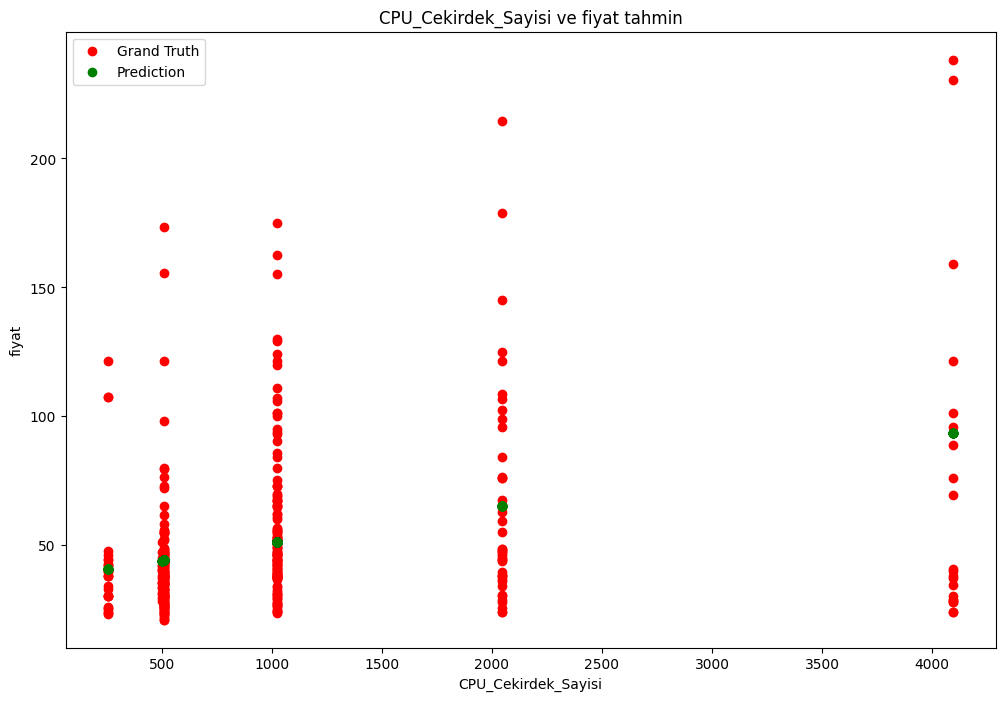

In [64]:
# gerçek data -> Grand Truth
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(X_test, y_test, label = "Grand Truth", color = "red")

# Tahmin -> Prediction

ax.scatter(X_test, y_pred, label = "Prediction", color = "green" )





plt.title("CPU_Cekirdek_Sayisi ve fiyat tahmin")
plt.xlabel("CPU_Cekirdek_Sayisi")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [65]:
y_test[0:10]

array([[101.207],
       [ 36.999],
       [ 54.999],
       [ 33.899],
       [ 30.299],
       [ 45.249],
       [100.999],
       [ 38.094],
       [ 30.999],
       [ 37.   ]])

In [66]:
y_pred[0:10]

array([[51.05935251],
       [93.47452665],
       [51.05935251],
       [43.99015682],
       [43.99015682],
       [43.99015682],
       [51.05935251],
       [43.99015682],
       [51.05935251],
       [51.05935251]])

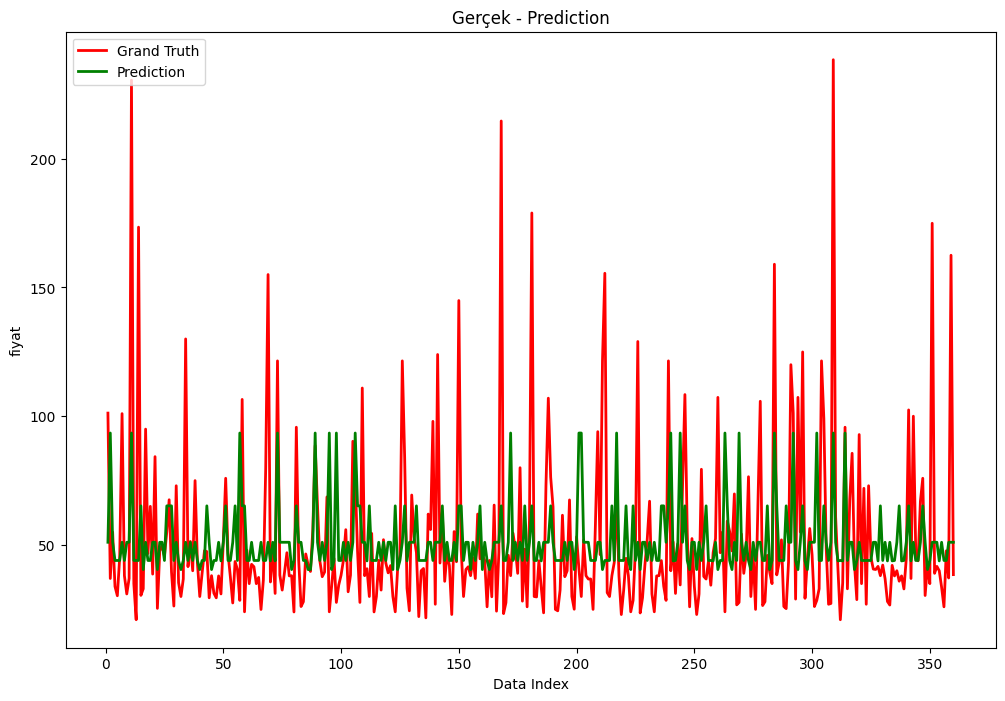

In [67]:
indexler = range(1,361)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test, label = "Grand Truth", color = "red", linewidth = 2)


ax.plot(indexler, y_pred, label = "Prediction", color = "green", linewidth = 2)



plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

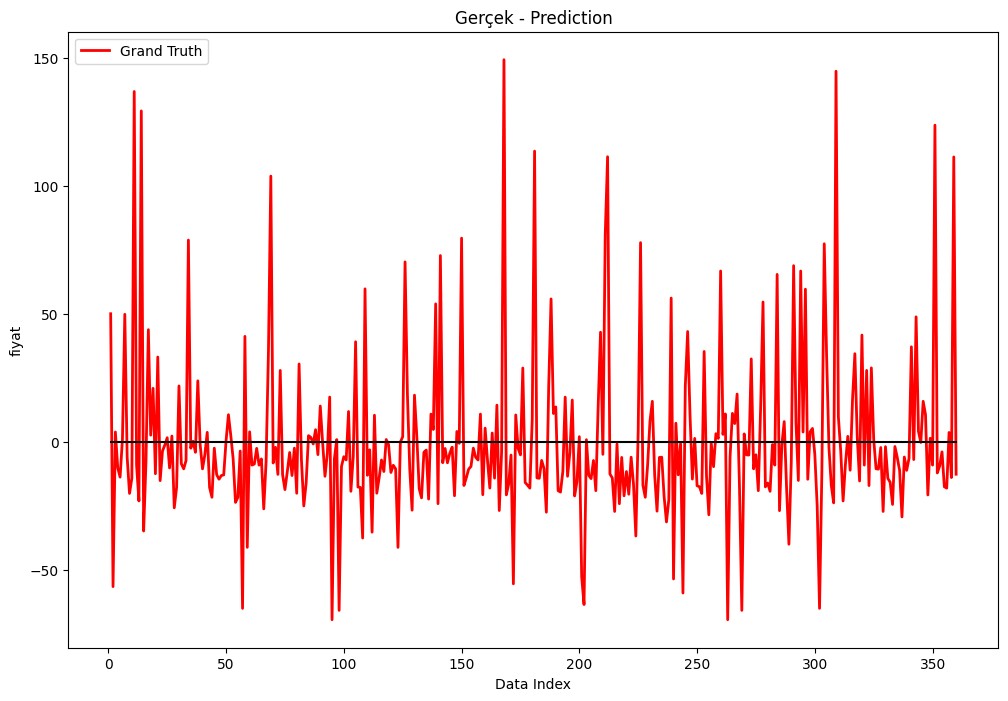

In [68]:
# Hatalar
indexler = range(1,361)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test - y_pred, label = "Grand Truth", color = "red", linewidth = 2)

ax.plot(indexler,np.zeros(360),color="black" )

plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
from sklearn.impute import SimpleImputer


# Now calculate r2_score on the imputed data
rtwo = r2_score(y_test, y_pred)
print(f"R^2 score: {rtwo}")
print(f"R^2 score (%): {rtwo*100}")

R^2 score: 0.06968019467255715
R^2 score (%): 6.968019467255715


In [71]:
mse = mean_squared_error(y_test,y_pred)

In [72]:
print(mse)

1002.4596742475374


In [73]:
import math
rmse = math.sqrt(mse)

In [74]:
print(rmse)

31.66164358095671
